## Estimate the total compensation to be provided to an employee

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"train_set.csv")

In [5]:
df.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [6]:
df.shape

(287836, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287836 entries, 0 to 287835
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                287836 non-null  int64  
 1   OGC                 287836 non-null  int64  
 2   OG                  287836 non-null  object 
 3   DC                  287836 non-null  object 
 4   Dept                287836 non-null  object 
 5   UC                  287836 non-null  int64  
 6   Union               287800 non-null  object 
 7   JF                  287798 non-null  object 
 8   Job                 287836 non-null  object 
 9   EI                  287836 non-null  int64  
 10  Salaries            287836 non-null  int64  
 11  Overtime            287836 non-null  int64  
 12  H/D                 287836 non-null  float64
 13  YT                  287836 non-null  object 
 14  Total_Compensation  287836 non-null  int64  
dtypes: float64(1), int64(7), object(7)

In [8]:
df.describe()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
count,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000
mean,2014.250104,2.976007,490.540186,26913.060020,63262.713139,4401.037115,8932.876472,97990.329882
std,1.016282,1.575586,333.238723,15539.719696,44638.657748,11079.137749,4894.072024,67750.020573
min,2013.000000,1.000000,1.000000,1.000000,-68771.000000,-12308.000000,-2940.470000,-74082.000000
25%,2013.000000,2.000000,236.000000,13434.000000,23406.000000,0.000000,4358.347500,35977.000000
50%,2014.000000,2.000000,535.000000,27013.000000,62504.500000,0.000000,11982.035000,98033.000000
75%,2015.000000,4.000000,790.000000,40397.250000,93000.250000,2738.000000,12801.790000,142138.250000
max,2016.000000,7.000000,990.000000,53794.000000,515101.000000,227313.000000,21872.800000,653498.000000


In [9]:
df['Overtime'] = df['Overtime'].apply(lambda x: 0 if x<=0 else x)
df['Salaries'] = df['Salaries'].apply(lambda x: 0 if x<=0 else x)
df['H/D'] = df['H/D'].apply(lambda x: 0 if x<=0 else x)

In [10]:
df.Year=df.Year.astype(int)
df["Year"]= 2022- df.Year
df.Year

0         7
1         9
2         7
3         6
4         9
         ..
287831    6
287832    7
287833    8
287834    9
287835    7
Name: Year, Length: 287836, dtype: int32

In [11]:
df = df.dropna()

In [12]:
df = df.select_dtypes(exclude="object")

In [13]:
df.head()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
0,7,4,250,6725,12196,0,0.00,16158
1,9,4,39,25058,74639,2820,12703.31,115784
2,7,6,21,46108,100554,0,12424.50,144708
3,6,1,911,33369,140164,52754,13043.87,242323
4,9,2,21,28684,58813,0,7655.28,82106


In [14]:
for i in df.columns:
  print("number of unique values in", i, df[i].nunique())

number of unique values in Year 4
number of unique values in OGC 7
number of unique values in UC 789
number of unique values in EI 52392
number of unique values in Salaries 104375
number of unique values in Overtime 33609
number of unique values in H/D 113568
number of unique values in Total_Compensation 155957


In [15]:
df.shape

(287798, 8)

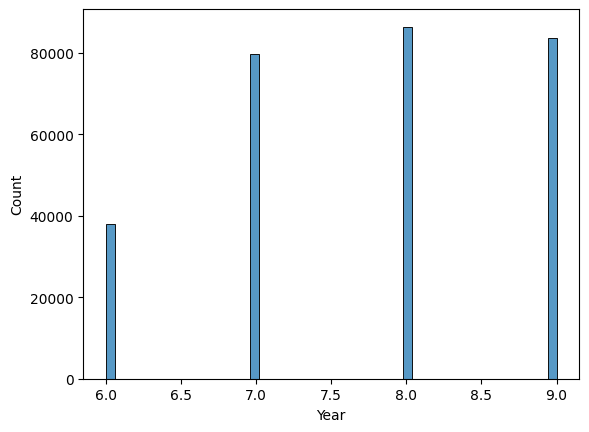

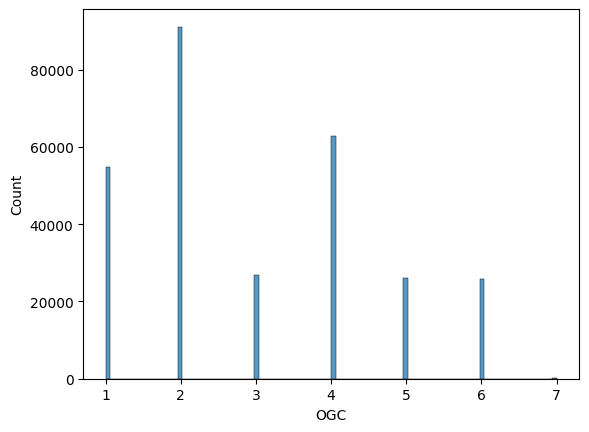

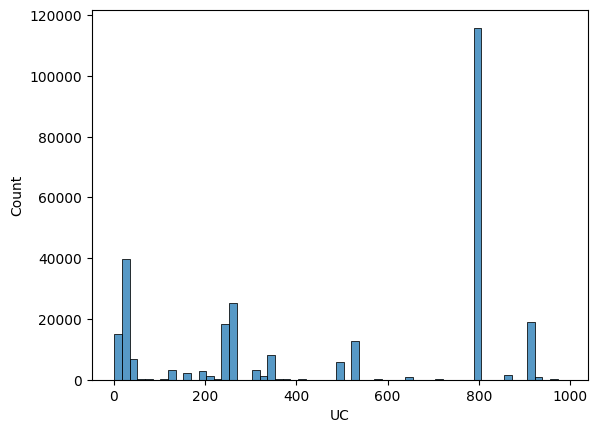

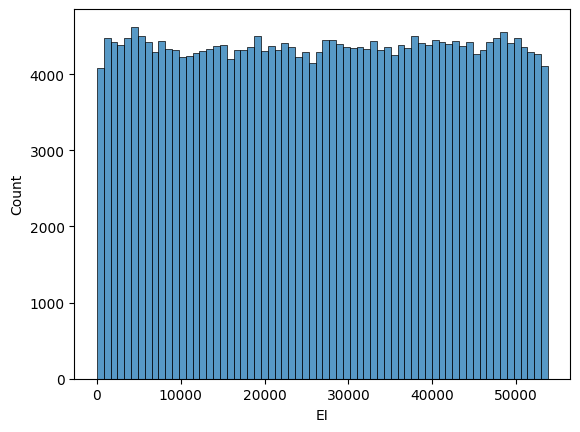

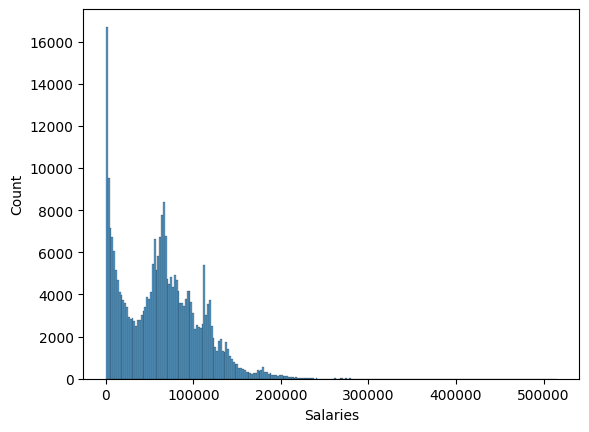

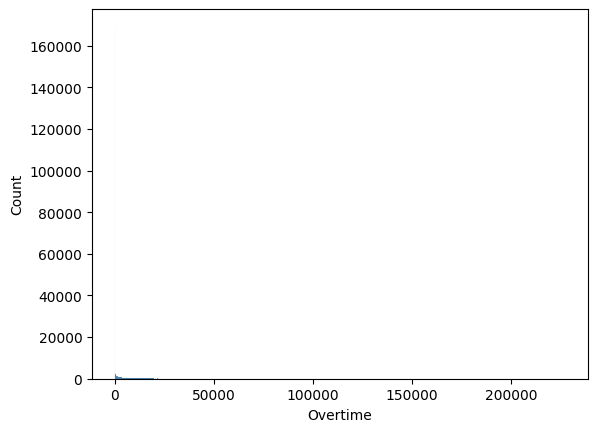

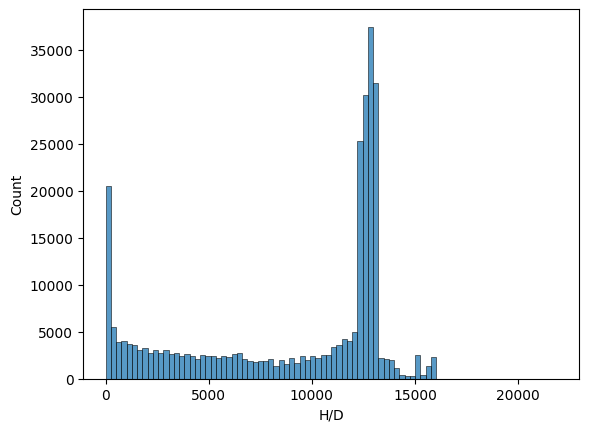

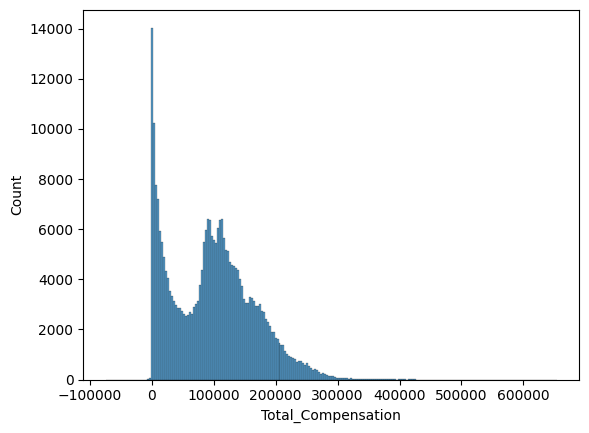

In [16]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

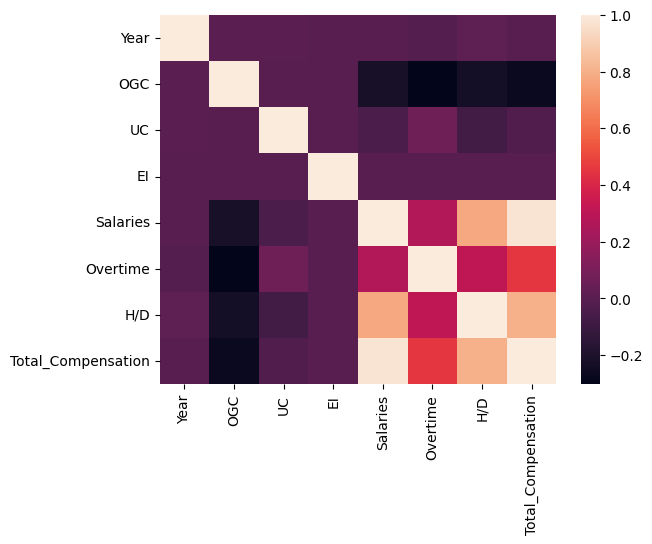

In [17]:
x = sns.heatmap(df.corr())

In [18]:
x = df.drop(["Total_Compensation"],axis=1).values
y = df.Total_Compensation.values

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [20]:
x

array([[-0.73820615,  0.64998314, -0.72170644, ..., -1.14421463,
        -0.39726578, -1.82562756],
       [ 1.23001075,  0.64998314, -1.35487783, ...,  0.25471369,
        -0.14274642,  0.77028808],
       [-0.73820615,  1.91937014, -1.40889245, ...,  0.83529482,
        -0.39726578,  0.71331338],
       ...,
       [ 0.2459023 , -0.61940385, -1.45390463, ...,  0.92260042,
        -0.39726578,  0.84214351],
       [ 1.23001075, -1.25409735, -0.72170644, ..., -1.09427771,
        -0.39726578, -0.99762363],
       [-0.73820615,  0.64998314,  0.90173299, ...,  0.94746806,
         0.41006603, -0.19207976]])

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

### Model Evaluation

In [24]:
print(lr.intercept_)

97997.15178729968


In [25]:
a = df.drop(["Total_Compensation"],axis=1).columns

In [26]:
coeff_df = pd.DataFrame(lr.coef_,a,columns=['Coefficient'])
coeff_df

,Coefficient
Year,-28.606190
OGC,-403.333147
UC,169.275868
EI,33.169486
Salaries,57977.467324
Overtime,13118.698743
H/D,5503.564323


### Predictions from Model

In [27]:
y_pred = lr.predict(x_test)

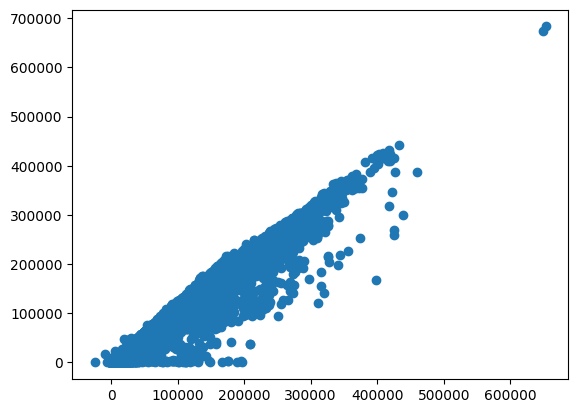

In [28]:
plt.scatter(y_test,y_pred,)

C:\Users\praveen\AppData\Local\Temp\ipykernel_14176\2218766812.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=60)


<Axes: ylabel='Density'>

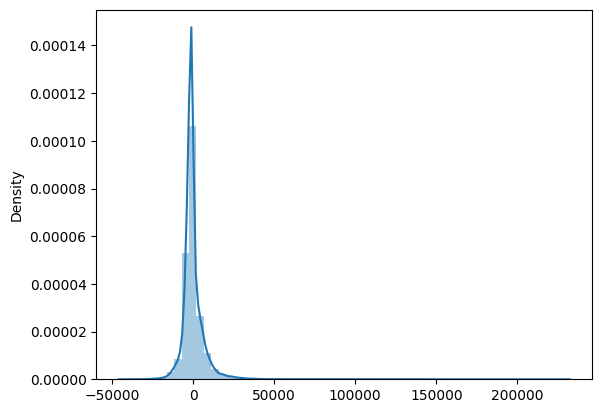

In [29]:
sns.distplot((y_test-y_pred),bins=60)

In [30]:
from sklearn import metrics

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4112.203854848478
MSE: 58760731.741545
RMSE: 7665.554888039417


In [32]:
lr.score(x_test,y_test)

0.9871250616820744